# **Auto Insurance; Fraud Claim Prediction Model**

Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain. Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud. Common frauds include “padding,” or inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents.

Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles.

***Source***: https://www.iii.org/article/background-on-insurance-fraud

# **Problem Statement**
” Our objective is to create an interface for insurance company with Machine Learning model in the backend, to identify the fraud claims in the automobile industry.”

**H0**: "*Give data is Genuine*"

**H1**: "*Given data is Fraud*"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm

### **Loading the Data**
Using pandas library, we imported insurance dataset.

***Source***: https://www.kaggle.com/roshansharma/insurance-claim

In [2]:
df=pd.read_csv("/Users/manu/SJC/Sem 2/MVS-Python/insurance_claims_report.csv")
df_copy = df.copy()
pd.set_option('display.max_columns', 100)
df_copy

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/14,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/01/15,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/06,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/01/15,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,18,687698,06/09/00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22/02/15,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/90,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/01/15,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/14,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/02/15,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16/07/91,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22/02/15,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05/01/14,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24/01/15,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17/02/03,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23/01/15,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18/11/11,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26/02/15,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


## 1. Data Cleaning

In [3]:
df_copy = df_copy[df_copy != '?']

In [4]:
df_copy.shape

(1000, 39)

In [5]:
df_copy['collision_type'].fillna(df_copy['collision_type'].mode()[0],inplace = True)
df_copy['incident_hour_of_the_day'].fillna(df_copy['incident_hour_of_the_day'].mode()[0],inplace = True)
df_copy['property_damage'].fillna(df_copy['property_damage'].mode()[0],inplace = True)
df_copy['police_report_available'].fillna(df_copy['police_report_available'].mode()[0],inplace = True)

In [6]:
df_copy['policy_bind_date'] = pd.to_datetime(df_copy['policy_bind_date'])
df_copy['incident_date'] = pd.to_datetime(df_copy['incident_date'])

## 2. Data Transformation

In [7]:
#Binning the incident hour

df_copy['incident_hour_of_the_day_cut']=pd.cut(df_copy['incident_hour_of_the_day'],
                               bins=[0,6,11,13,17,20,24], 
                               labels=['Early Morning (0AM - 06AM)','Morning (06AM - 11AM)',
                                       'Noon (11AM - 01PM)','After Noon (01PM - 05PM)','Evening (05PM - 08PM)',
                                       'Night (08PM - 12PM)'])



In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   months_as_customer            1000 non-null   int64         
 1   age                           1000 non-null   int64         
 2   policy_number                 1000 non-null   int64         
 3   policy_bind_date              1000 non-null   datetime64[ns]
 4   policy_state                  1000 non-null   object        
 5   policy_csl                    1000 non-null   object        
 6   policy_deductable             1000 non-null   int64         
 7   policy_annual_premium         1000 non-null   float64       
 8   umbrella_limit                1000 non-null   int64         
 9   insured_zip                   1000 non-null   int64         
 10  insured_sex                   1000 non-null   object        
 11  insured_education_level       1

In [9]:
df_copy['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:
dfcolumns = df_copy.columns.to_list()

## 3. Encoding the data

In [11]:
import sklearn.preprocessing as pre
lb=pre.LabelEncoder()

In [12]:
#list of categorical vsriables
lt=df_copy.select_dtypes(exclude=['int','float']).columns.to_list()

In [13]:
lt

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'incident_hour_of_the_day_cut']

In [14]:
for x in lt:
    df_copy[x]=lb.fit_transform(df_copy[x])
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_hour_of_the_day_cut
0,328,48,521585,941,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,15,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,1
1,228,42,342868,639,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,11,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,3
2,134,18,687698,405,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,33,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,3
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,54,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,1
4,228,44,367455,926,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,28,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,2


## 4. Data Normalisation

In [15]:
df_ML=df_copy.drop('fraud_reported',axis = 1)

In [16]:
df_test = pre.minmax_scale(df_ML.values)

In [17]:
df_Norm = df_ML
df_Norm.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,incident_hour_of_the_day_cut
0,328,48,521585,941,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,15,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,639,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,11,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,3
2,134,18,687698,405,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,33,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,3
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,54,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,926,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,28,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,2


In [18]:
fraud_reported = df_copy['fraud_reported']

In [19]:
df_Norm = df_Norm.join(fraud_reported)

In [20]:
df_Norm

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,incident_hour_of_the_day_cut,fraud_reported
0,328,48,521585,941,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,15,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,1
1,228,42,342868,639,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,11,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,3,1
2,134,18,687698,405,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,33,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,3,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,54,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,1
4,228,44,367455,926,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,28,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,70,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,33,2,0,1,1,0,4,561,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,2,0
996,285,41,186934,919,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,14,2,1,0,1,4,3,227,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,4,0
997,130,34,918516,514,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,13,0,2,1,4,0,0,746,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,1,0
998,458,62,533940,832,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,37,2,1,0,3,1,0,569,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,1,0


## 5. Feature Selection

In [21]:
def features_train_score_DT(data,list_columns_drop):
    x_scale = data.drop('fraud_reported',axis = 1)
    Y = data['fraud_reported']
    x_train,x_test,y_train,y_test = ms.train_test_split(x_scale,Y,
                                                    test_size = 0.3,
                                                    random_state =11121)
    
    model_DT = DecisionTreeClassifier()
    model_DT.fit(x_train,y_train)
    importance = model_DT.feature_importances_
    #for i,v in enumerate(importance):
       # print('Feature: %0d, Score: %.5f' % (i,v))
    
    ar = dict(zip(data.columns,importance))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
    return ar

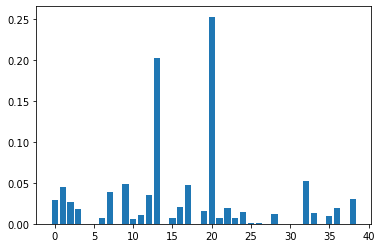

{'months_as_customer': 0.02957942664805199,
 'age': 0.044852292801172304,
 'policy_number': 0.0263713821721117,
 'policy_bind_date': 0.018685009481945115,
 'policy_state': 0.0,
 'policy_csl': 0.0,
 'policy_deductable': 0.0068784998974366525,
 'policy_annual_premium': 0.038616490576606585,
 'umbrella_limit': 0.0,
 'insured_zip': 0.04911763765710266,
 'insured_sex': 0.0058037342884621765,
 'insured_education_level': 0.010888910998352848,
 'insured_occupation': 0.035374956334091906,
 'insured_hobbies': 0.20281317059482423,
 'insured_relationship': 0.0,
 'capital-gains': 0.0072670715844461,
 'capital-loss': 0.02105296444457106,
 'incident_date': 0.04710119705851801,
 'incident_type': 0.0,
 'collision_type': 0.015918814048353398,
 'incident_severity': 0.25317953643275076,
 'authorities_contacted': 0.006771023336539206,
 'incident_state': 0.019260877847602796,
 'incident_city': 0.006964481146154613,
 'incident_location': 0.014560924470386212,
 'incident_hour_of_the_day': 0.001289833311716220

In [22]:
features_train_score_DT(df_Norm,['fraud_reported'])

In [23]:
print(dfcolumns)

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', 'incident_hour_of_the_day_cut']


In [24]:
Features_selected = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_annual_premium', 
                     'insured_zip', 'insured_occupation', 'insured_hobbies', 'incident_date', 'incident_severity', 
                     'incident_state', 'injury_claim', 'auto_model','incident_hour_of_the_day_cut']

## 6. Input and Traget Variable

In [25]:
#Feature and Outcome variables

df_features = df_Norm[Features_selected]

df_outcome = df_Norm['fraud_reported']

### 6.1 Data Balancing

SMOTE (Synthetic Minority Oversampling Technique) technique generates synthetic data for the minority class. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

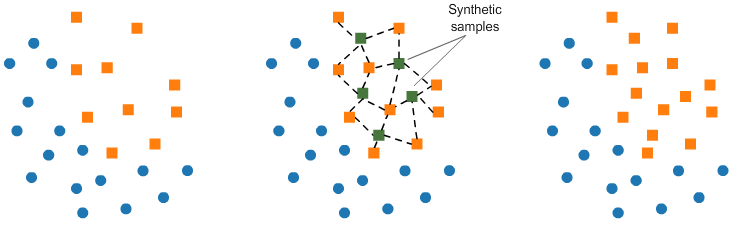

SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df_features, df_outcome)

print('Original dataset shape', df_features.shape,df_outcome.shape)
print('Resample dataset shape', x_smote.shape,y_smote.shape)

Original dataset shape (1000, 14) (1000,)
Resample dataset shape (1506, 14) (1506,)


In [27]:
#Spliting the data into train and test dataset

x_train,x_test,y_train,y_test = ms.train_test_split(x_smote,y_smote,
                                                    test_size = 0.3,
                                                    random_state =121231234)

In [28]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((452, 14), (1054, 14), (452,), (1054,))

In [29]:
y_test.value_counts()

0    238
1    214
Name: fraud_reported, dtype: int64

In [30]:
#function to plot roc curve

def roc_auc_curve(estimator, x_test, y_true):
    y_proba = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = round(roc_auc_score(y_test, y_proba), 4)
    plt.figure(figsize = (10, 10))
    sns.lineplot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC AUC Curve for Fraud Detection")
    plt.show()
    
#Function to create classification report

def classification_graph(y_true, y_predict):
    clf_report = classification_report(y_true, y_predict, 
                                       target_names = ['Genuine', 'Fraud'], 
                                       output_dict=True)
    plt.figure(figsize = (8, 7))
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, 
                annot=True,
                cmap="YlGnBu")
    plt.title('Classification Report of Model')
    plt.show()

## 7. Model Selection

### 7.1 Logistic Regression

In [31]:
log = LogisticRegression()

In [32]:
log.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred_LR=log.predict(x_test)

In [34]:
#Accuracy Score

Acc_LR = accuracy_score(y_test,y_pred_LR)
Acc_LR

0.5309734513274337

In [35]:
#confusion matrix

cm_LR = confusion_matrix(y_test, y_pred_LR)

<AxesSubplot:>

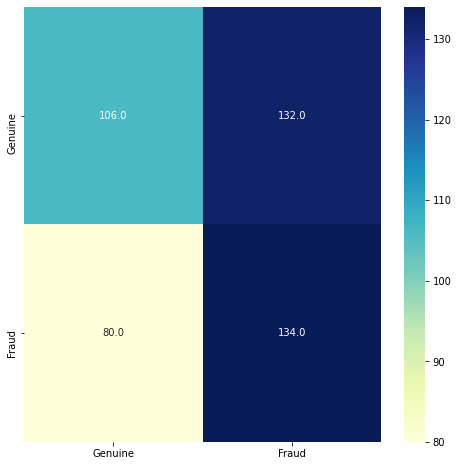

In [36]:
plt.figure(figsize = (8,8))
sns.heatmap(cm_LR,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])

***Confusion Matrix***

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj20_vvu6DwAhVBcCsKHUz4Dp4QFjAPegQIAhAD&url=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-confusion-matrix-a9ad42dcfd62&usg=AOvVaw2LgjVzNETLZZfRIPEg-WgQ

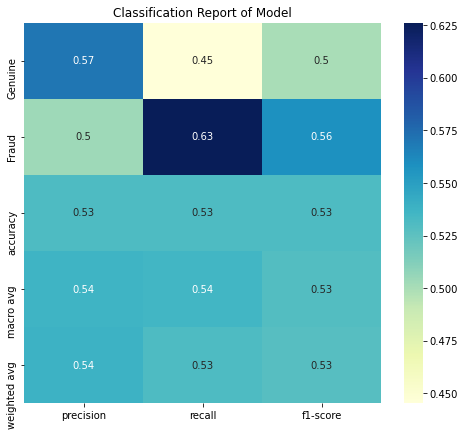

In [37]:
classification_graph(y_test, y_pred_LR)

In [38]:
#F1 Score

acc_f1_LR = f1_score(y_pred_LR, y_test, average ='weighted').round(4)
acc_f1_LR

0.5343

In [39]:
#Log Loss

acc_logloss_LR = log_loss(y_test, y_pred_LR, eps=1e-15, normalize = True).round(4)
acc_logloss_LR

16.1998

In [40]:
#AUC Score

y_proba_LR = log.predict_proba(x_test)[::,1]
auc_score_LR = roc_auc_score(y_test, y_proba_LR)
auc_score_LR

0.5384630487709102

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


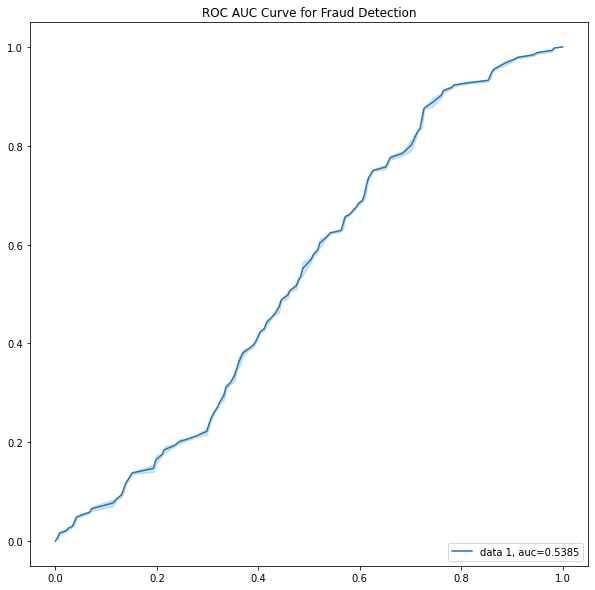

In [41]:
#ROC Curve

roc_auc_curve(log,x_test,y_pred_LR)

***ROC AUC Curve***

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjZxJyevKDwAhUVYysKHRjjCVQQFjARegQIHhAD&url=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-auc-roc-curve-68b2303cc9c5&usg=AOvVaw2_mkFtzX-kC2s1vgiVRuN1

### 7.2 Decision Tree

In [42]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

In [43]:
dtc.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=7)>

In [44]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [45]:
y_pred_DT = dtc.predict(x_test)

In [46]:
Acc_DT = accuracy_score(y_test,y_pred_DT)
Acc_DT

0.8075221238938053

In [47]:
#Confusion Matrix

cm_DT = confusion_matrix(y_test, y_pred_DT)

In [48]:
cm_DT

array([[207,  31],
       [ 56, 158]])

<AxesSubplot:>

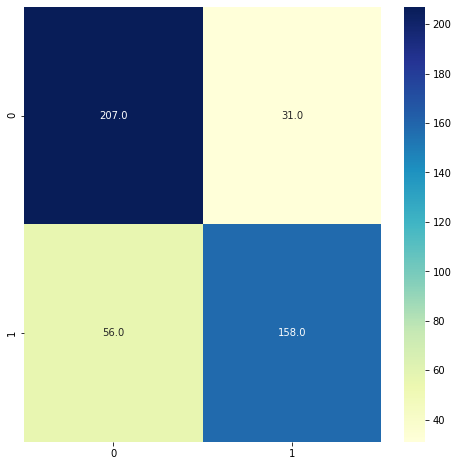

In [49]:
plt.figure(figsize = (8,8))
sns.heatmap(cm_DT,annot = True, fmt = ".1f",cmap='YlGnBu')

In [50]:
cr=classification_report(y_test,y_pred_DT,target_names=['Yes','N0'])
print(cr)

              precision    recall  f1-score   support

         Yes       0.79      0.87      0.83       238
          N0       0.84      0.74      0.78       214

    accuracy                           0.81       452
   macro avg       0.81      0.80      0.81       452
weighted avg       0.81      0.81      0.81       452



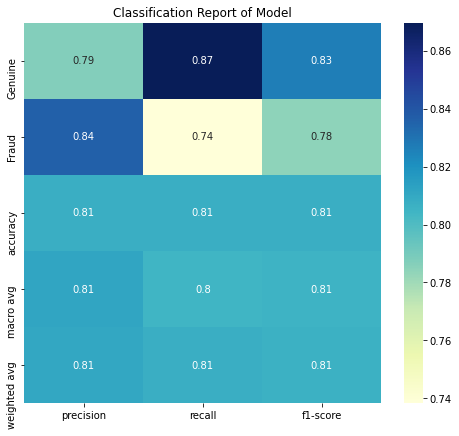

In [51]:
classification_graph(y_test, y_pred_DT)

In [52]:
#F1 Score

acc_f1_DT = f1_score(y_pred_DT, y_test, average ='weighted').round(4)
acc_f1_DT

0.8087

In [53]:
#Log Loss

acc_logloss_DT = log_loss(y_test, y_pred_DT, eps=1e-15, normalize = True).round(4)
acc_logloss_DT

6.648

In [54]:
y_proba_DT = dtc.predict_proba(x_test)[::,1]
auc_score_DT = roc_auc_score(y_test, y_proba_DT)
auc_score_DT

0.8326886829498155

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


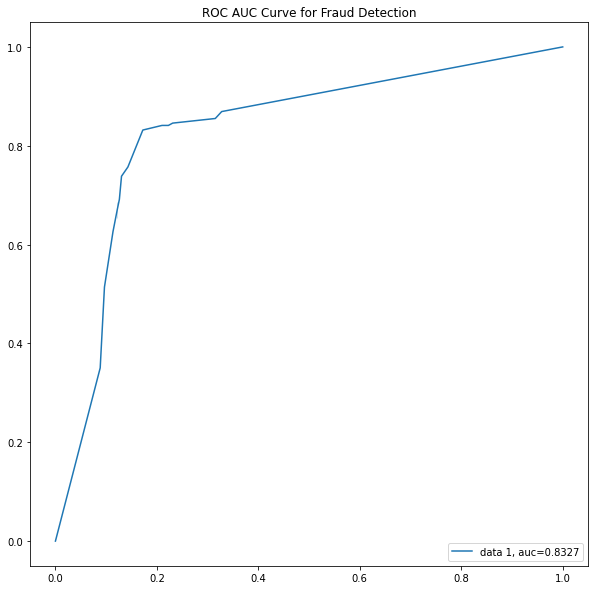

In [55]:
roc_auc_curve(dtc,x_test,y_pred_DT)

### 7.3 Random Forest

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_RF=rfc.predict(x_test)

In [59]:
Acc_RF=accuracy_score(y_test,y_pred_RF)
Acc_RF

0.8407079646017699

In [60]:
#confusion matrix

cm_RF = confusion_matrix(y_test, y_pred_RF)

<AxesSubplot:>

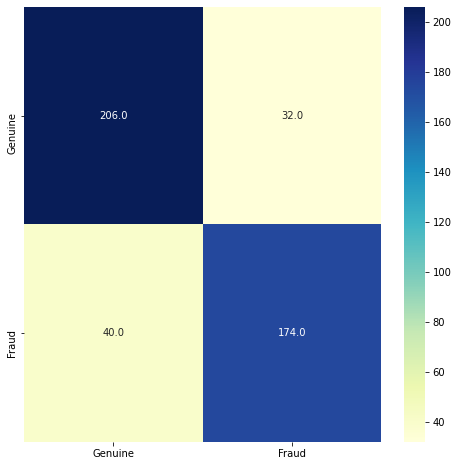

In [61]:
plt.figure(figsize = (8,8))
sns.heatmap(cm_RF,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])

In [62]:
Random_forest_report=classification_report(y_test,y_pred_RF,target_names=['Yes','N0'])
print(Random_forest_report)

              precision    recall  f1-score   support

         Yes       0.84      0.87      0.85       238
          N0       0.84      0.81      0.83       214

    accuracy                           0.84       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.84      0.84      0.84       452



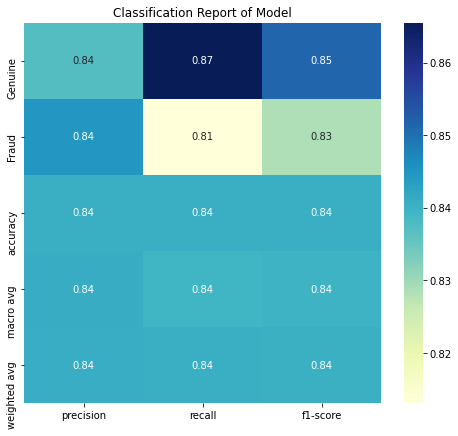

In [63]:
classification_graph(y_test, y_pred_RF)

In [64]:
acc_logloss_RF = log_loss(y_test, y_pred_RF, eps=1e-15, normalize = True)
acc_logloss_RF

5.501808600777291

In [65]:
acc_f1_RF = f1_score(y_pred_RF, y_test, average ='weighted')
acc_f1_RF

0.8409085685030978

In [66]:
y_proba_RF = rfc.predict_proba(x_test)[::,1]
auc_score_RF = roc_auc_score(y_test, y_proba_RF)
auc_score_RF

0.9199520929867274

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


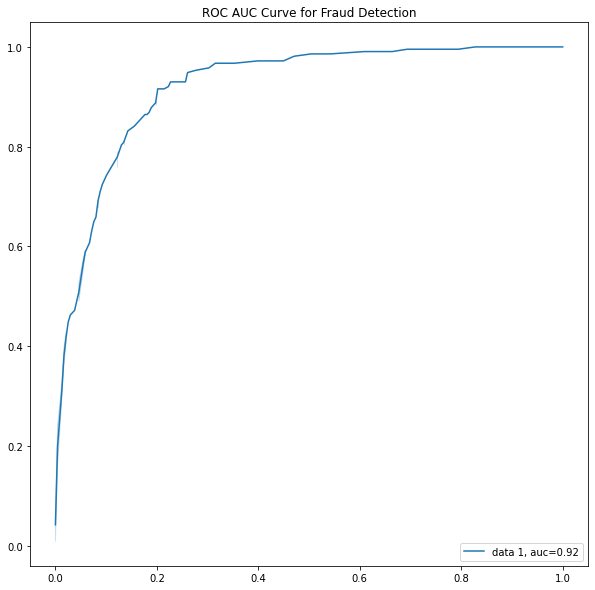

In [67]:
roc_auc_curve(rfc,x_test,y_pred_RF)

### 7.4 Support Vector Machine (SVM)

In [68]:
sv=svm.SVC(kernel = 'rbf', probability = True)

In [69]:
sv.fit(x_train,y_train)

SVC(probability=True)

In [70]:
y_pred_SVM=sv.predict(x_test)

In [71]:
Acc_SVM=accuracy_score(y_test,y_pred_SVM)
Acc_SVM

0.5486725663716814

In [72]:
#confusion matrix

cm_SVM = confusion_matrix(y_test, y_pred_SVM)

<AxesSubplot:>

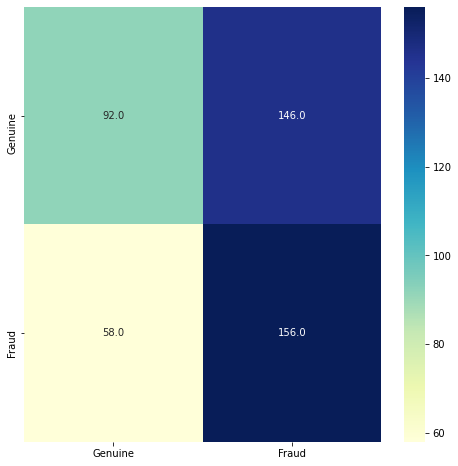

In [73]:
plt.figure(figsize = (8,8))
sns.heatmap(cm_SVM,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])

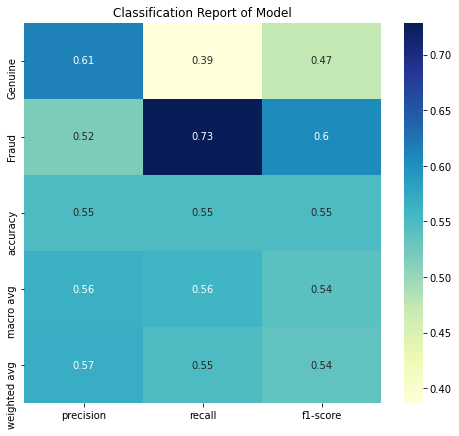

In [74]:
classification_graph(y_test, y_pred_SVM)

In [75]:
acc_logloss_SVM = log_loss(y_test, y_pred_SVM, eps=1e-15, normalize = True)
acc_logloss_SVM

15.588555588023423

In [76]:
acc_f1_SVM = f1_score(y_pred_SVM, y_test, average ='weighted')
acc_f1_SVM

0.5613687428790871

In [77]:
y_proba_SVM = sv.predict_proba(x_test)[::,1]
auc_score_SVM = roc_auc_score(y_test, y_proba_SVM)
auc_score_SVM

0.5610814419225634

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


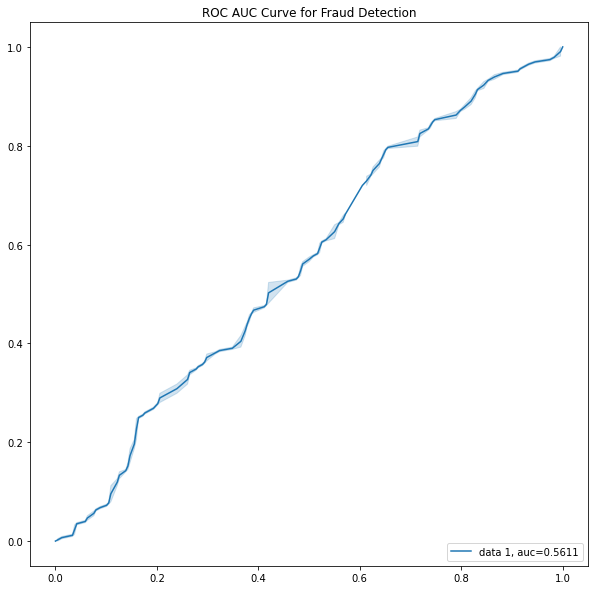

In [78]:
roc_auc_curve(sv,x_test,y_pred_SVM)

## 8. Final Report

In [79]:
finalreport = { 'Logistic Regression':[Acc_LR, acc_f1_LR, auc_score_LR],
               'Decision Tree':[Acc_DT, acc_f1_DT, auc_score_DT], 
               'Random Forest':[Acc_RF, acc_f1_RF, auc_score_RF],
               'Suppot Vector Machine':[Acc_SVM, acc_f1_SVM, auc_score_SVM]
               }

In [80]:
Report = pd.DataFrame(finalreport, index = ['Accuracy Score','F1 score','Area Under the Curve'])

In [81]:
Report

,Logistic Regression,Decision Tree,Random Forest,Suppot Vector Machine
Accuracy Score,0.530973,0.807522,0.840708,0.548673
F1 score,0.534300,0.808700,0.840909,0.561369
Area Under the Curve,0.538463,0.832689,0.919952,0.561081


## 9. Conclusion

The performance of the test data of a classification model can be measure using precision recall and ROC - AUC Scores. 

Here,

***H0*** : Given data is genuine

***H1*** : Given data is fraud

A model is said to be the best when it has lower error rates.

***type I error*** : Predicting the fraud genuine data as fraud


***type II error***: Predicting the fraud data as geuine

From a companies perpective, type II error is more sever then type II error. Because predicting a fraud data as geuine will cause high financial loss to them. So while building the model, the aim is to reduce type II error more significantly. 

The Random Forest Model performed better comparing with other models. It comparitively reduced both type I and type II error with AUC score of 0.926529.

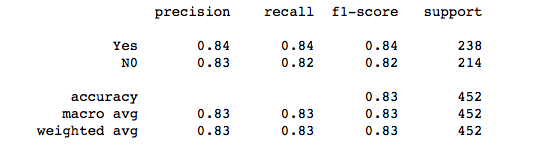